## Introduction to Atmospheric Radar Course - Practical 1

<img src="NCAS_national_centre_logo_transparent.png" alt="NCAS" style="width: 200px;"/>

## An Introduction to reading and interogating radar files with open source radar packages
### Part 2 - Xradar

#### Overview
This notebook introduces Xradar. Xradar was developed by a collaboration of Py-ART and Wradlib developers. We introduce the data model used by Xradar, how to read data files with Xradar and how to use the data model to interogate basic information found within those files. An example file from the NCAS mobile X-band radar is used in this notebook.

##### An introduction to Xradar

- Official source code repository: https://github.com/openradar/xradar
- 
HTML documentation: https://docs.openradarscience.org/projects/xradar/en/stable/


Xradar is a much newer package than Py-ART but can be useful for visualising the structure of the data files along with allowing plotting in a different way (as we'll see in a later practical).

We'll start by importing xradar along with xarray. [Xarray](https://docs.xarray.dev/en/stable/) is a package for working with labelled, multi-dimensional arrays in python. Xradar is designed to read radar data into xarray to leverage its functionality. The code base provides specific readers that can be used within xarray io calls to allow radar data files to be opened into ```xarray.Datasets```.



In [1]:
import xradar
import xarray
import matplotlib.pyplot as plt

##### The Xradar data model

In [2]:
data_folder = ''
example_file = data_folder+'ncas-mobile-x-band-radar-1_sandwith_20191110-204252_SUR_v1.nc'

We'll start with opening the example file using the [```xradar.io.open_cfradial1_datatree```](https://docs.openradarscience.org/projects/xradar/en/stable/generated/xradar.io.backends.cfradial1.open_cfradial1_datatree.html#xradar.io.backends.cfradial1.open_cfradial1_datatree) function. 

In [3]:
dtree = xradar.io.open_cfradial1_datatree(
    example_file,
    optional=False,
)
display(dtree)

/home/users/dufton/software/miniconda3/envs/RadarEnv/lib/python3.12/site-packages/xradar/io/backends/cfradial1.py:148: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(root.dims["sweep"]):


DataTree('root', parent=None)
│   Dimensions:              (sweep: 10)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        float64 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U9 'sweep_0.0' 'sweep_1.0' ... 'sweep_9.0'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes:
│       Conventions:         CF-1.7
│       version:             CF-Radial-1.4
│       title:               Moments from the NCAS Mobile X-band Radar at Sandwit...
│       institution:         National Centre for Atmospheric Science (NCAS)
│       references:          https://doi.org/10.5194/amt-11-6481-2018
│       source:              Leonardo Gematronik 50DX Mobile X-band Radar
│       history:             Version 1, uncalibrated file
│       comment:             (1) platform_type attribute values are specific to C...
│       instrument_name:     ncas-mobile-x-band-radar-1
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_receiver_bandwidth  float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_antenna_gain_v      float32 ...
│           radar_beam_width_h        float32 ...
│           radar_beam_width_v        float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/55)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           zdr_correction            float32 ...
│           ldr_correction_h          float32 ...
│           ldr_correction_v          float32 ...
│           system_phidp              float32 ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 360, range: 1000)
│       Coordinates:
│           time               (azimuth) datetime64[ns] 2019-11-10T20:43:06.154000 .....
│         * range              (range) float32 75.0 225.0 375.0 ... 1.498e+05 1.499e+05
│           elevation          (azimuth) float32 ...
│         * azimuth            (azimuth) float32 0.01099 1.011 2.016 ... 358.0 359.0
│           latitude           float64 ...
│           longitude          float64 ...
│           altitude           float64 ...
│       Data variables: (12/39)
│           sweep_number       float64 ...
│           sweep_mode         <U20 'azimuth_surveillance'
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           sweep_fixed_angle  float32 ...
│           CCOR               (azimuth, range) float32 ...
│           ...                 ...
│           dBuZ               (azimuth, range) float32 ...
│           dBuZv              (azimuth, range) float32 ...
│           uKDP               (azimuth, range) float32 ...
│           uKDPu              (azimuth, range) float32 ...
│           uPhiDP             (azimuth, range) float32 ...
│           uPhiDPu            (azimuth, range) float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 360, range: 1000)
│       Coordinates:
│           time               (azimuth) datetime64[ns] 2019-11-10T20:43:33.615000 .....
│         * range              (range) float32 75.0 225.0 375.0 ... 1.498e+05 1.499e+05
│           elevation          (azimuth) float32 ...
│         * azimuth            (azimuth) float32 0.005493 1.005 2.005 ... 358.0 359.0
│           latitude           float6

The [```datatree```](https://xarray-datatree.readthedocs.io/en/latest/generated/datatree.DataTree.html#datatree.DataTree) object allows us to display a lot of the information we accessed in the previous exercise within a more user friendly, notebook ready interface.

Let's take a few minutes to explore all the different sections within the object and see where different items are located.

Think about the following:

1. Why does the top level structure have no coordinates?
2. Where can we find the metadata from the last exercise?


We'll next make a single line plot of a radial as we did in the last practical. Once again we'll use the 0 index ray from the first sweep. In this case, due to the group structure we need to index to ```sweep_0``` first and then extract the field we want to plot (`dBuZ` again here).

Text(0, 0.5, 'Horizontal reflectivity (dBZ)')

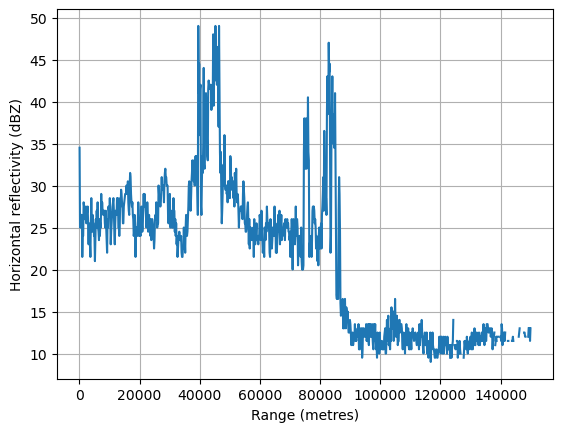

In [4]:
plt.plot(dtree['sweep_0']['dBuZ'].range.values, dtree['sweep_0']['dBuZ'].values[0])
plt.grid()
plt.xlabel('Range (metres)')
plt.ylabel('Horizontal reflectivity (dBZ)')

If you compare to the plot from the previous exercise, we see that they do not match. This is because xradar has reindex the sweep data to start with the first radial after 0 degrees azimuth, rather than storing them in the data model in time order. We can see that by looking at the azimuth data for the radial we have just plotted:

In [5]:
dtree['sweep_0']['dBuZ'].azimuth.values[0]

0.010986328

We can also use xradar to open a radar file into a xarray Dataset using a specific io engine. In this case our data is stored using the cfradial v1.4 standard, so we can use the `cfradial1` engine. In this case each sweep of radar data needs to be read into its own Dataset. Here we'll take the first sweep in the file, sweep_0. Depending on the use case, reading only a single sweep may be more efficient computationally and could be helpful. It also makes navigating the data easier with one less level to step through. However more of the metadata is omitted from the file so as a first look at the data we'd suggest using an alternative approach.

In [6]:
ds = xarray.open_dataset(example_file, group="sweep_0", engine="cfradial1")
display(ds)

/home/users/dufton/software/miniconda3/envs/RadarEnv/lib/python3.12/site-packages/xradar/io/backends/cfradial1.py:148: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(root.dims["sweep"]):


<xarray.Dataset>
Dimensions:                    (azimuth: 360, range: 1000)
Coordinates:
    time                       (azimuth) datetime64[ns] ...
  * range                      (range) float32 75.0 225.0 ... 1.499e+05
    elevation                  (azimuth) float32 ...
  * azimuth                    (azimuth) float32 0.01099 1.011 ... 358.0 359.0
    latitude                   float64 ...
    longitude                  float64 ...
    altitude                   float64 ...
Data variables: (12/52)
    sweep_number               float64 ...
    sweep_mode                 <U20 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    ray_start_range            (azimuth) float32 ...
    ...                         ...
    dBuZ                       (azimuth, range) float32 ...
    dBuZv                      (azimuth, range) float32 ...
    uKDP                       (azimuth, range) float32 ...
    uKDPu                      (azimuth, range) float32 ...
    uPhiDP                     (azimuth, range) float32 ...
    uPhiDPu                    (azimuth, range) float32 ...

We can see that creating the radial plot requires less steps through the data strucutre in this case but that otherwise it behaves the same as using the datatree approach.

Text(0, 0.5, 'Horizontal reflectivity (dBZ)')

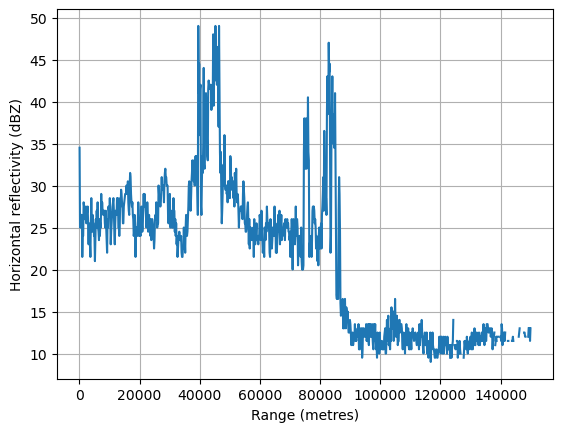

In [7]:
plt.plot(ds['dBuZ'].range.values, ds['dBuZ'].values[0])
plt.grid()
plt.xlabel('Range (metres)')
plt.ylabel('Horizontal reflectivity (dBZ)')

This notebook has provided a brief introduction to xradar. We'll cover using xradar to plot data in a later practical. Understanding the data structures used within the different packages helps with simple coding tasks but also develops knowledge of how to join useful code from the different packages together when doing analysis. For an initial investigation of data files other tools that can be useful for looking at radar data stored in netcdf files are [ncdump](https://www.unidata.ucar.edu/software/netcdf/workshops/2011/utilities/index.html) and [Panoply](https://www.giss.nasa.gov/tools/panoply/download/). One of the main advantages of the more specific tools Py-ART and xradar is their ability to open radar data stored in a range of alternative formats such as Sigmet, Rainbow, Odim and Nexrad.



To finish this session we'll now spend some time working in a fresh notebook to begin exploring data files provided to each group as a case study. Each groups data can be found within the  Use the time to get familiar with opening files in the notebooks, exploring the data and metadata within them. We'll also use the time to chat you all about your past experience with radar data and how you're finding the course so far.